In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [32]:
df2 = pd.read_csv('Classify-2DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df2.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,0
2,0.98,-0.26,0
3,-0.55,0.38,1
4,0.43,0.47,0


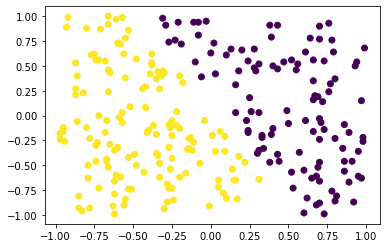

In [33]:
plt.scatter(df2['Col1'], df2['Col2'], c=df2['Class'])
plt.show()

It is linearly seperable.

In [34]:
X=df2[['Col1', 'Col2']].to_numpy()
y=df2[['Class']].to_numpy()


In [35]:
import sys

class Perceptron(object):
    def __init__(self, input_dim):
        self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
        self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)
    
    def activation(self, pred):
        return np.where(pred >= 0, 1, 0)
    
    def predict(self, data):
        return self.activation(np.dot(data, self.weights.T))
    
    def train(self, input_data, targets, epochs, lr=0.01):
        losses = []
        for e in range(1, epochs + 1):
            epoch_loss = 0
            for data, target in zip(input_data, targets):
                pred = self.predict(data)
                error = target - pred
                update = lr * error
                epoch_loss += error ** 2
                self.weights += update * data
                self.bias += update
            losses.append(epoch_loss)
            
            print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}", end="")
            sys.stdout.flush()
            
        return losses
        

In [36]:
p = Perceptron(input_dim=2)


In [37]:
losses = p.train(X,y, epochs=12)

Epoch 12/12, Loss : [0]]

12 epochs are used to reach a 0 loss.

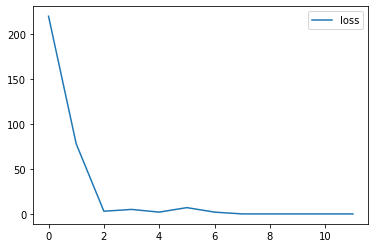

In [41]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

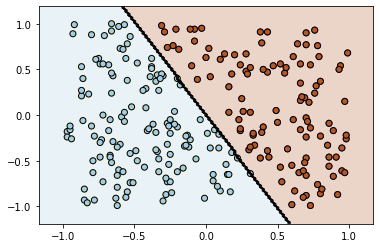

In [42]:
h=0.02
x_min, x_max = X[:, 0].min() - 10*h, X[:, 0].max() + 10*h
y_min, y_max = X[:, 1].min() - 10*h, X[:, 1].max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired_r', edgecolors='k');